In [403]:
import numpy as np
import matplotlib.pyplot as plt

In [446]:
def plot_scene(points, projectiles, box=False, rays=False):
    plt.hlines(y=0, xmin=-4, xmax=4, color='black', alpha=0.5)
    plt.vlines(x=0, ymin=-4, ymax=4, color='black', alpha=0.5)
    plt.scatter(points[0, :], points[1, :], color='black')
    plt.scatter(projectiles[0, :], projectiles[1, :], marker='x', c='b', s=100)

    for i in range(projectiles.shape[1]):
        x, y = projectiles[:, i]
        plt.text(x + .2, y - .4, i + 1, fontsize=15)

    for i in range(points.shape[1]):
        x1, y1 = points[:, i]
        x2, y2 = points[:, (i+1) % points.shape[1]]
        plt.plot([x1, x2], [y1, y2], c='r')

    if box:
        plt.hlines(y=np.min(points[1, :]), xmin=-4, xmax=4, color='green', linestyle='--')
        plt.hlines(y=np.max(points[1, :]), xmin=-4, xmax=4, color='green', linestyle='--')
        plt.vlines(x=np.min(points[0, :]), ymin=-4, ymax=4, color='green', linestyle='--')
        plt.vlines(x=np.max(points[0, :]), ymin=-4, ymax=4, color='green', linestyle='--')

    if rays:
        for i in range(projectiles.shape[1]):
            x, y = projectiles[:, i]
            plt.hlines(y=y, xmin=x, xmax=4, color='b', linestyle='--')

    plt.gca().set_aspect('equal', adjustable='box')
    plt.show()

# Problemstellung

In [405]:
po_1 = np.array([.5, .5])
po_2 = np.array([2, 1])
po_3 = np.array([3.5, .5])
po_4 = np.array([2, 2.5])

points = np.vstack([po_1, po_2, po_3, po_4]).T
points

array([[0.5, 2. , 3.5, 2. ],
       [0.5, 1. , 0.5, 2.5]])

In [406]:
pr_1 = np.array([-1, 1.4])
pr_2 = np.array([2, .75])
pr_3 = np.array([2.75, 3.5])
pr_4 = np.array([2.2, 1.6])

projectiles = np.vstack([pr_1, pr_2, pr_3, pr_4]).T
projectiles

array([[-1.  ,  2.  ,  2.75,  2.2 ],
       [ 1.4 ,  0.75,  3.5 ,  1.6 ]])

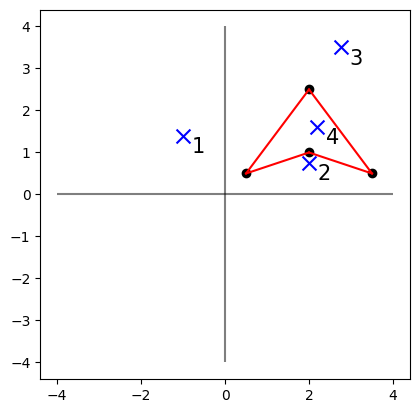

In [407]:
plot_scene(points, projectiles, rays=False, box=False)

# Box-Algorithmus

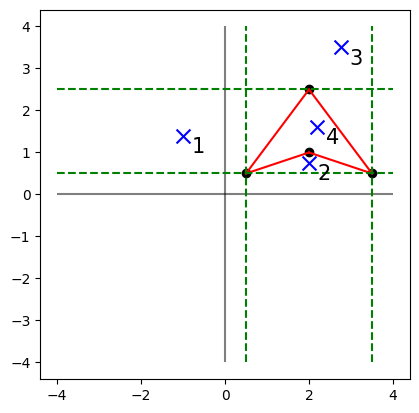

In [408]:
plot_scene(points, projectiles, rays=False, box=True)

In [409]:
def box_collision(object_points: np.ndarray, projectile: np.ndarray):
    # Check if Projectile out of the Box (x-Axis)
    if projectile[0] < np.min(object_points[0, :]) or projectile[0] > np.max(object_points[0, :]):
        return False
    # Check if Projectile out of the Box (y-Axis)
    if projectile[1] < np.min(object_points[1, :]) or projectile[1] > np.max(object_points[1, :]):
        return False

    return True

In [410]:
for i in range(projectiles.shape[1]):
    projectile = projectiles[:, i]
    print(f'[{i+1}] {box_collision(points, projectile)}')

[1] False
[2] True
[3] False
[4] True


# Ray-Casting

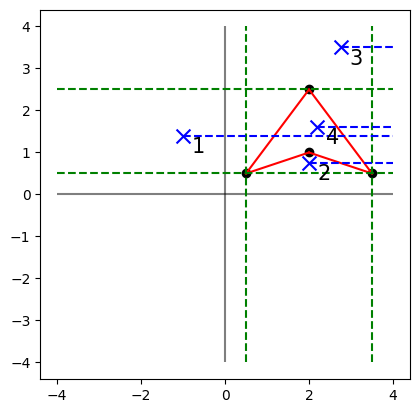

In [411]:
plot_scene(points, projectiles, rays=True, box=True)

In [412]:
def collision_ray_casting(object_points: np.ndarray, projectile: np.ndarray):
    # Check if Projectile out of the Box (x-Axis)
    if projectile[0] < np.min(object_points[0, :]) or projectile[0] > np.max(object_points[0, :]):
        return False
    # Check if Projectile out of the Box (y-Axis)
    if projectile[1] < np.min(object_points[1, :]) or projectile[1] > np.max(object_points[1, :]):
        return False

    # Loop through each Point of Object in order to get each Line
    intersection_flag = False
    for i in range(object_points.shape[1]):
        x1, y1 = object_points[:, i]
        x2, y2 = object_points[:, (i+1) % object_points.shape[1]]

        # Calculate Intersection Point of Line
        m = (y2 - y1) / (x2 - x1)
        t = y1 - m * x1
        x_intersection = (projectile[1] - t) / m

        # Check if Intersection Point is on Line and if only the Virtual Ray-Trace is only on theh right side of the Projectile
        if (min(x1, x2) <= x_intersection and max(x1, x2) >= x_intersection) and x_intersection >= projectile[0]:
            intersection_flag = not intersection_flag

    return intersection_flag

In [425]:
for i in range(projectiles.shape[1]):
    projectile = projectiles[:, i]
    print(f'[{i+1}] {collision_ray_casting(points, projectile)}')

[1] False
[2] False
[3] False
[4] True


# Include Edge-Cases (x1 = x2; y1 = y2)

In [414]:
ec_1 = np.array([1.5, 1])
ec_2 = np.array([3, 1])
ec_3 = np.array([3, 3])

edge_case_points = np.vstack([ec_1, ec_2, ec_3]).T
edge_case_points

array([[1.5, 3. , 3. ],
       [1. , 1. , 3. ]])

In [415]:
pec_1 = np.array([2, 1])
pec_2 = np.array([1.5, .5])
pec_3 = np.array([1.5, 3])
pec_4 = np.array([2.2, 1.6])

edge_case_projectiles = np.vstack([pec_1, pec_2, pec_3, pec_4]).T
edge_case_projectiles

array([[2. , 1.5, 1.5, 2.2],
       [1. , 0.5, 3. , 1.6]])

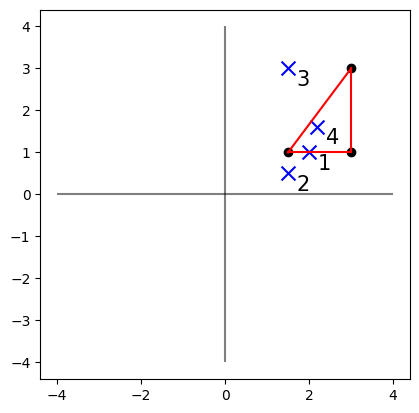

In [421]:
plot_scene(edge_case_points, edge_case_projectiles, rays=False, box=False)

In [417]:
for i in range(edge_case_projectiles.shape[1]):
    projectile = edge_case_projectiles[:, i]
    print(f'[{i+1}] {collision_ray_casting(edge_case_points, projectile)}')

[1] False
[2] False
[3] True
[4] False


/tmp/ipykernel_4161670/364431704.py:18: RuntimeWarning: invalid value encountered in scalar divide
  x_intersection = (projectile[1] - t) / m
/tmp/ipykernel_4161670/364431704.py:16: RuntimeWarning: divide by zero encountered in scalar divide
  m = (y2 - y1) / (x2 - x1)
/tmp/ipykernel_4161670/364431704.py:18: RuntimeWarning: divide by zero encountered in scalar divide
  x_intersection = (projectile[1] - t) / m


In [422]:
def collision_ray_casting_with_edge_cases(object_points: np.ndarray, projectile: np.ndarray):
    # Check if Projectile out of the Box (x-Axis)
    if projectile[0] < np.min(object_points[0, :]) or projectile[0] > np.max(object_points[0, :]):
        return False
    # Check if Projectile out of the Box (y-Axis)
    if projectile[1] < np.min(object_points[1, :]) or projectile[1] > np.max(object_points[1, :]):
        return False

    # Loop through each Point of Object sequentually in order to get each Line
    intersection_flag = False
    for i in range(object_points.shape[1]):
        x1, y1 = object_points[:, i]
        x2, y2 = object_points[:, (i+1) % object_points.shape[1]]

        # Edge-Case (y1 = y2)
        if y1 == y2:
            if (min(x1, x2) <= projectile[0] and max(x1, x2) >= projectile[0]) and projectile[0] == y1:
                return True
            else:
                continue

        # Edge-Case (x1 = x2)
        if x1 == x2:
            if (projectile[1] <= max(y1, y2) and projectile[1] >= min(y1, y2)) and x1 >= projectile[0]:
                intersection_flag = not intersection_flag
                continue

        # Calculate Intersection Point of Line
        m = (y2 - y1) / (x2 - x1)
        t = y1 - m * x1
        x_intersection = (projectile[1] - t) / m

        # Check if Intersection Point is on Line and if only the Virtual Ray-Trace is only on theh right side of the Projectile
        if (min(x1, x2) <= x_intersection and max(x1, x2) >= x_intersection) and x_intersection >= projectile[0]:
            intersection_flag = not intersection_flag

    return intersection_flag

In [423]:
for i in range(edge_case_projectiles.shape[1]):
    projectile = edge_case_projectiles[:, i]
    print(f'[{i+1}] {collision_ray_casting_with_edge_cases(edge_case_points, projectile)}')

[1] True
[2] False
[3] False
[4] True


# Brute-Force Test

In [470]:
def plot_brute_force_scene(points, projectiles, colors, box=False, rays=False, text=True):
    plt.hlines(y=0, xmin=-4, xmax=4, color='black', alpha=0.5)
    plt.vlines(x=0, ymin=-4, ymax=4, color='black', alpha=0.5)
    plt.scatter(points[0, :], points[1, :], color='black')
    plt.scatter(projectiles[0, :], projectiles[1, :], marker='x', c=colors, s=20)

    for i in range(projectiles.shape[1]):
        x, y = projectiles[:, i]

    for i in range(points.shape[1]):
        x1, y1 = points[:, i]
        x2, y2 = points[:, (i+1) % points.shape[1]]
        plt.plot([x1, x2], [y1, y2], c='r')

    if box:
        plt.hlines(y=np.min(points[1, :]), xmin=-4, xmax=4, color='green', linestyle='--')
        plt.hlines(y=np.max(points[1, :]), xmin=-4, xmax=4, color='green', linestyle='--')
        plt.vlines(x=np.min(points[0, :]), ymin=-4, ymax=4, color='green', linestyle='--')
        plt.vlines(x=np.max(points[0, :]), ymin=-4, ymax=4, color='green', linestyle='--')

    if rays:
        for i in range(projectiles.shape[1]):
            x, y = projectiles[:, i]
            plt.hlines(y=y, xmin=x, xmax=4, color='b', linestyle='--')

    plt.gca().set_aspect('equal', adjustable='box')
    plt.show()

In [471]:
x_grid, y_grid = np.meshgrid(np.linspace(-4, 4, 40), np.linspace(-4, 4, 40))
brute_force_projectiles = np.vstack((x_grid.flatten(), y_grid.flatten()))

In [474]:
collision_classifications = []
for i in range(brute_force_projectiles.shape[1]):
    projectile = brute_force_projectiles[:, i]
    collision_classifications.append(collision_ray_casting_with_edge_cases(points, projectile))

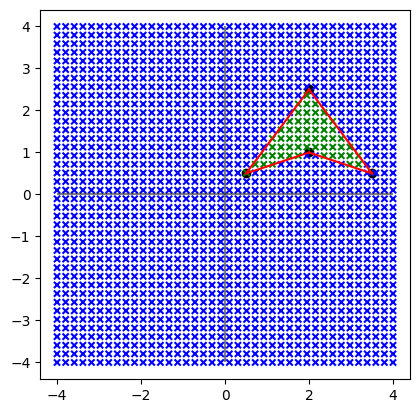

In [475]:
colors = ['green' if collision else 'blue' for collision in collision_classifications]
plot_brute_force_scene(points, brute_force_projectiles, colors, text=False)

In [479]:
collision_classifications = []
for i in range(brute_force_projectiles.shape[1]):
    projectile = brute_force_projectiles[:, i]
    collision_classifications.append(collision_ray_casting_with_edge_cases(edge_case_points, projectile))

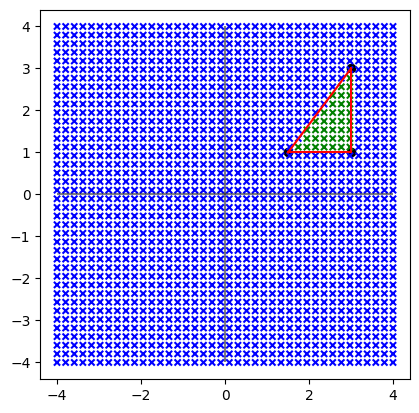

In [480]:
colors = ['green' if collision else 'blue' for collision in collision_classifications]
plot_brute_force_scene(edge_case_points, brute_force_projectiles, colors, text=False)